In [1]:
ls

test.ipynb  Untitled.ipynb


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [13]:
trait1 = pd.read_table('../output/mlp/r=10000/trait1/final/predictions.txt', index_col=2)
trait2 = pd.read_table('../output/mlp/r=10000/trait2/final/predictions.txt', index_col=2)
trait3 = pd.read_table('../output/mlp/r=10000/trait3/final/predictions.txt', index_col=2)

In [20]:
predictions = pd.concat([trait1['prediction'], trait2['prediction'], trait3['prediction']], axis=1)
predictions.columns = ['trait1', 'trait2', 'trait3']
predictions

,trait1,trait2,trait3
number,,,
4754,-2.114442,-0.348331,-1.459339
4755,-2.697541,-0.745021,-1.972485
4756,-2.522864,-0.813231,-2.056523
4757,-2.634221,-0.826225,-2.050358
4758,-2.738848,-0.895077,-2.313328
4759,-2.825093,-1.112659,-2.226862
4760,-2.597159,-0.672105,-1.914814
4761,-2.792078,-0.520924,-1.956844
4762,-2.673009,-0.778038,-2.061757


In [12]:
table.to_csv('final_predictions.txt', sep='\t')

In [16]:
phenotypes = pd.read_table('../emaize_data/phenotype/pheno_emaize.txt')
pedigree = phenotypes['pedigree'].str.split('_', expand=True)
pedigree.columns = ['f', 'X', 'm']
phenotypes = pd.concat([phenotypes, pedigree], axis=1)
phenotypes['number'] = np.arange(phenotypes.shape[0])
parent_table = phenotypes.pivot_table(values='number', index=['m'], columns=['f'], dropna=False)
male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
parent_table = parent_table.loc[male_ids, female_ids]

In [17]:
parent_table

f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207
m,,,,,,,,,,,,,,,,,,,,,
m1,0,1,2,3,4,5,6,7,8,9,...,4762,4764,4756,4761,4763,5050,5051,5052,5053,5054
m2,191,192,193,195,196,197,198,199,200,201,...,333,379,4767,4768,4777,5055,5056,5057,5058,5059
m3,380,381,382,384,385,386,387,388,389,390,...,520,569,442,4786,4789,5060,5061,5062,5063,5064
m4,570,571,572,574,575,576,577,578,579,580,...,4797,4802,633,4796,4800,5065,5066,5067,5068,5069
m5,759,760,761,763,764,765,766,767,768,769,...,901,4814,4805,835,4813,5277,5278,5279,5280,5281
m6,949,950,951,953,954,955,956,957,958,959,...,4824,1137,4818,4822,4827,5489,5490,5491,5492,5493
m7,1138,1139,1140,1142,1143,1144,1145,1146,1147,1148,...,4838,1326,4831,4837,4840,5494,5495,5496,5497,5498
m8,1327,1328,1329,1331,1332,1333,1334,1335,1336,1337,...,4848,1517,4842,1405,4851,5499,5500,5501,5502,5503
m9,1518,1519,1520,1522,1523,1524,1525,1526,1527,1528,...,1659,1707,4855,4861,4863,5504,5505,5506,5507,5508


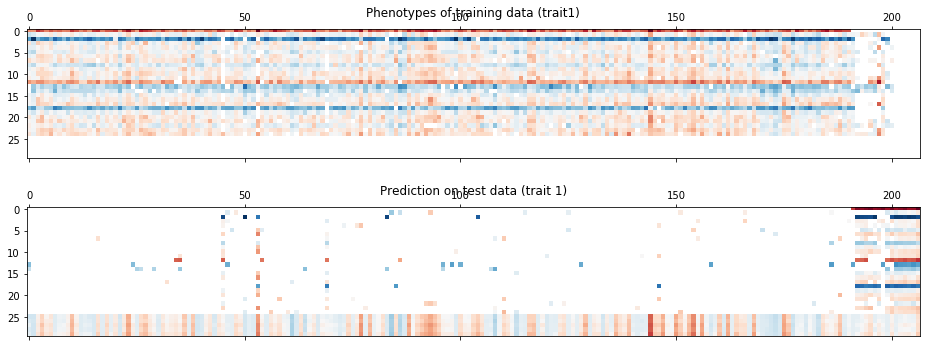

In [53]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait1'].values), parent_table), cmap=cm.RdBu)
ax[0].set_title('Phenotypes of training data (trait1)')

trait1_pred = np.full(phenotypes.shape[0], np.nan)
trait1_pred[predictions.index.tolist()] = predictions['trait1'].values
ax[1].matshow(np.take(trait1_pred, parent_table), cmap=cm.RdBu)
ax[1].set_title('Prediction on test data (trait 1)')

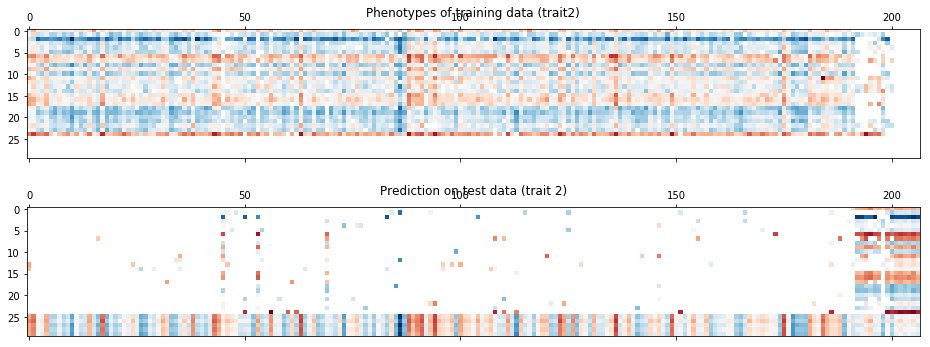

In [50]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait2'].values), parent_table), cmap=cm.RdBu)
ax[0].set_title('Phenotypes of training data (trait2)')

trait2_pred = np.full(phenotypes.shape[0], np.nan)
trait2_pred[predictions.index.tolist()] = predictions['trait2'].values
ax[1].matshow(np.take(trait2_pred, parent_table), cmap=cm.RdBu)
ax[1].set_title('Prediction on test data (trait 2)')

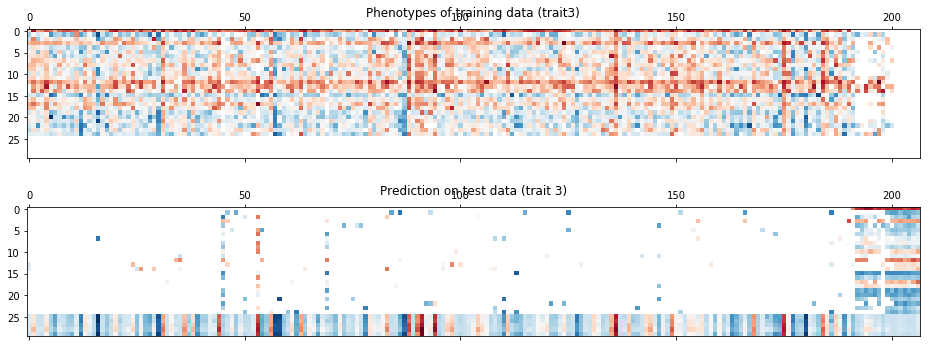

In [51]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait3'].values), parent_table), cmap=cm.RdBu)
ax[0].set_title('Phenotypes of training data (trait3)')

trait3_pred = np.full(phenotypes.shape[0], np.nan)
trait3_pred[predictions.index.tolist()] = predictions['trait3'].values
ax[1].matshow(np.take(trait3_pred, parent_table), cmap=cm.RdBu)
ax[1].set_title('Prediction on test data (trait 3)')